# Keywords
World Population Data Analysis; Future Prediction; WorldBank Data; Europe's Population; SARIMA Model

# SDG Goals
- SDG 3 - Good Health and Well-being
- SDG 8 - Decent Work And Economic Growth
- SDG 15 - Life On Land

# 1. Introduction
This analysis has been carried out using the world's population data. The main motivation of this analysis is to gain insights about the population in the Europe for the previous as well as the upcoming years. This project is intended to forecast the population of the Europe till the year 2050. This analysis is useful for the government and stakeholders whose main concern is linked with the population of the country. They can use this to gain insights about the future estimated population to create such policies that would help their countries to boost in terms of economy, power, and politically.

# 2. Data Used
The dataset that has been used for this analysis has been downloaded from the worldbank.org website. The population data contains the world population data from year 1960 to 2021. The countries shapefile has all the administrative boundaries for all the countries in the world.

Data Sources:

- Population Data: https://data.worldbank.org/indicator/SP.POP.TOTL
- Countries Shapefile: https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/

# 3. Python Libraries Used

We have used Pandas library to read the csv files into the dataframe. 

The Geopandas library is used to deal with the dataset having the geometries involved. Since we want to manipulate the countries shapefile, therefore we need to use geopandas. 

We have used matplotlib library to create different charts and plot. It has also been used to add details such as title, xlabel, ylabel, etc., to the plots

We have used seaborn library just to set the style of the plots and charts.

We have used warnings library so that the notebook looks clean and it does not show any warning if any of the library version is deprecated or old.

The statsmodel and pmdarima libraries have been used to make predictions of the future population in the European region.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import pmdarima as pm
import statsmodels.api as sm
sns.set_style('whitegrid')

# 4. Data Preprocessing

#### Reading the dataset

In [2]:
popData = pd.read_csv('data/WorldPopulationData_1960-2021.csv', header = 2)
metadata = pd.read_csv('data/Metadata_Country.csv')
countries = gpd.read_file('data/Shapefile/world-administrative-boundaries.shp')

In [3]:
popData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN


In [4]:
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [5]:
countries.head()

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,None,Adm. by EGY,EGY,Ma'tan al-Sarra,Africa,Northern Africa,None,Ma'tan al-Sarra,"POLYGON ((33.25104 21.99977, 34.15064 21.99603..."
1,CHE,Member State,CHE,Switzerland,Europe,Western Europe,CH,Suisse,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ..."
2,None,UK Territory,GBR,Jersey,Europe,Northern Europe,None,Jersey,"POLYGON ((-2.01500 49.21417, -2.02111 49.17721..."
3,AUT,Member State,AUT,Austria,Europe,Western Europe,AT,Autriche,"POLYGON ((16.94618 48.61907, 16.94333 48.57333..."
4,PRT,Member State,PRT,Portugal,Europe,Southern Europe,PT,Portugal,"POLYGON ((-7.43185 37.25319, -7.41903 37.18055..."


#### Cleaning the dataset

In the populationData, metadata dataframes, there is an additional empty column named 'Unnamed: 66' and 'Unnamed: 5', which we will drop because it does not contain any information.

In [6]:
metadata = metadata.drop('Unnamed: 5', axis = 1)
popData = popData.drop('Unnamed: 66', axis = 1)

Next we drop the rows which have NaN values to avoid errors during our analysis.

In [7]:
# The countries shapefile contains null values for some of the rows. So we drop those rows to clean the data
countries = countries.dropna()
popData = popData.dropna()

#### Subsetting the dataset

The analysis is meant to be carried out on the European region. Therefore, it is required to filter the world population data to a specific region. The WorldPopulationData CSV file does not contain information regarding the region, but the Countries shapefile have that information. So, we first need to select the CountryCodes from Shapefile for our region and then filter our WorldPopulationData using these CountryCodes.

We filter out the name of the countries which are in Europe using the data from this link: 
- https://www.worldometers.info/geography/how-many-countries-in-europe/

This contains the name of the European countries which are 43 according the website above except the 'Holy See' which has the status of 'Permanent Observer to the UN', therefore, we will skip this country. We will extract these from the countries shapefile

In [8]:
regionMask = countries['region'].str.contains('Europe')
statusMask = countries['status'] == 'Member State'
euCountries = countries[regionMask & statusMask]['iso3'].values.tolist()

In [9]:
# Filtering the world population data for the Europe & Central Asian region
euPopData = popData[popData['Country Code'].str.contains(('|').join(euCountries))]

# Reset the index
euPopData = euPopData.reset_index(drop = True)

#### Merge Geopandas and Pandas
We see that the population data have the country names only, but the geometry data is missing that dataframe. Therefore, we will merge this pandas dataframe with the countries geopandas dataframe and thus creating the geometry column in the population data. Since we want to merge these two dataframes, therefore there must be some common column for merging them. For our data, we will use the country codes to merge.

In [10]:
countries.rename(columns = {'iso3': 'Country Code'}, inplace = True)

In [11]:
data = countries.merge(euPopData, on = 'Country Code')
data = data[data['status'] == 'Member State']

In [12]:
data.head()

,Country Code,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry,Country Name,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CHE,Member State,CHE,Switzerland,Europe,Western Europe,CH,Suisse,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ...",Switzerland,...,7996861.0,8089346.0,8188649.0,8282396.0,8373338.0,8451840.0,8514329.0,8575280.0,8636561.0,8697723.0
1,AUT,Member State,AUT,Austria,Europe,Western Europe,AT,Autriche,"POLYGON ((16.94618 48.61907, 16.94333 48.57333...",Austria,...,8429991.0,8479823.0,8546356.0,8642699.0,8736668.0,8797566.0,8840521.0,8879920.0,8916864.0,8956279.0
2,PRT,Member State,PRT,Portugal,Europe,Southern Europe,PT,Portugal,"POLYGON ((-7.43185 37.25319, -7.41903 37.18055...",Portugal,...,10514844.0,10457295.0,10401062.0,10358076.0,10325452.0,10300300.0,10283822.0,10286263.0,10297081.0,10299423.0
4,LUX,Member State,LUX,Luxembourg,Europe,Western Europe,LU,Luxembourg,"POLYGON ((6.36217 49.45939, 6.32833 49.46916, ...",Luxembourg,...,530946.0,543360.0,556319.0,569604.0,582014.0,596336.0,607950.0,620001.0,630419.0,639070.0
5,EST,Member State,EST,Estonia,Europe,Northern Europe,EE,Estonie,"MULTIPOLYGON (((22.98485 58.59944, 23.09083 58...",Estonia,...,1322696.0,1317997.0,1314545.0,1315407.0,1315790.0,1317384.0,1321977.0,1326855.0,1329479.0,1329254.0


#### Drop Irrelevant Columns

In [13]:
data.columns

Index(['Country Code', 'status', 'color_code', 'name', 'continent', 'region',
       'iso_3166_1_', 'french_shor', 'geometry', 'Country Name',
       'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

We now have create the required data for our analysis on the European region population, next we remove the unneccesary columns from our dataframe. We do not need 'Indicator Name', 'Indicator Code', 'color_code', 'continent', 'region', 'iso_3166_1_', 'french_shor' information, so we drop these columns.

In [14]:
data.drop(['Indicator Name', 'Indicator Code', 'color_code', 'continent', 'region', 'name',
                'iso_3166_1_', 'french_shor'], axis = 1, inplace = True)

In [15]:
data.columns

Index(['Country Code', 'status', 'geometry', 'Country Name', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

#### Functions Declaration

The data which we have downloaded only contains the population numbers for each year but it lacks the Population Growth (Annual Percent Increase). Therefore, we will calculate this parameter for each of the countries and create a new dataframe for it.

Formula to calculate growth percent for e.g. year 1990 ((population(1990) - population(1989)) / popluation(1990) * 100)

In [16]:
def growthPercentCalculate(df, year1, year2):
    percentage = ((df[str(year2)] - df[str(year1)]) / df[str(year2)]) * 100
    return percentage

#### Creating new data

In the metadata CSV file, there is a column named 'Income Group' which represents whether the country has 'High Income', 'Low Income', 'Lower Middle Income', or 'Higher Middle Income'. So, we will merge the data with the metadata csv file to incorporate more information about the data.

In [17]:
data = data.merge(metadata[['Country Code', 'IncomeGroup']], on = 'Country Code')

Generating the population growth (Annual Percentage) data using the already available population data

In [18]:
# Creating an empty dataframe to store data into
popGrowthDf = pd.DataFrame()

# Creating a dictionary to temporarily store data into
popGrowth = {}

# Creating a list of years to iterate through each year to extract data from the dictionary
years = [i for i in range(1960,2022)]

# Iterating through each of the country code one by one
for row, countryCode in enumerate(data['Country Code'].unique()):
    # Filtering the data from the whole dataframe of population
    country = data[data['Country Code'] == countryCode]
    
    # Storing the current country code into the dictionary
    popGrowth['Country Code'] = countryCode
    
    # Iterating through each year from the list which we created before
    for index, year in enumerate(years):
        # This check ensures that we don't get run out of indexes in the dataframe columns, 
        # because we are using year+1 in our formula to calculate the population growth
        if year not in [2021]:
            growthPercent = growthPercentCalculate(country, years[index], years[index + 1])
            
            # Storing the calculated data into a temporary dictionary
            popGrowth['growth_' + str(year + 1)] = growthPercent
    
    dfDictPopGrowth = pd.DataFrame.from_dict(popGrowth)
    
    # Appending the data for all the countries
    popGrowthDf = pd.concat([popGrowthDf, dfDictPopGrowth])

Next we merge this newly created dataframe with the population dataframe

In [19]:
data = data.merge(popGrowthDf, on = 'Country Code')

We will create a new column in the data dataframe to store the coordinates of the centroid of the countries. This may be useful somewhere in the visualizations later on.

In [20]:
coords = data['geometry'].apply(lambda x: x.representative_point().coords[:])
data['center'] = [coord[0] for coord in coords]

In [21]:
# Exporting the processed data into the local drive
data.to_csv('ProcessedDataForAnalysis.csv', index = False)

# Data Analysis & Visualizations

#### Europe's Population Change over time

We will analyze the total population for the European region from the year 1960 to 2021 to visualize the general trend of the population

In [22]:
_1960_to_2021 = data[[str(year) for year in years]].sum()

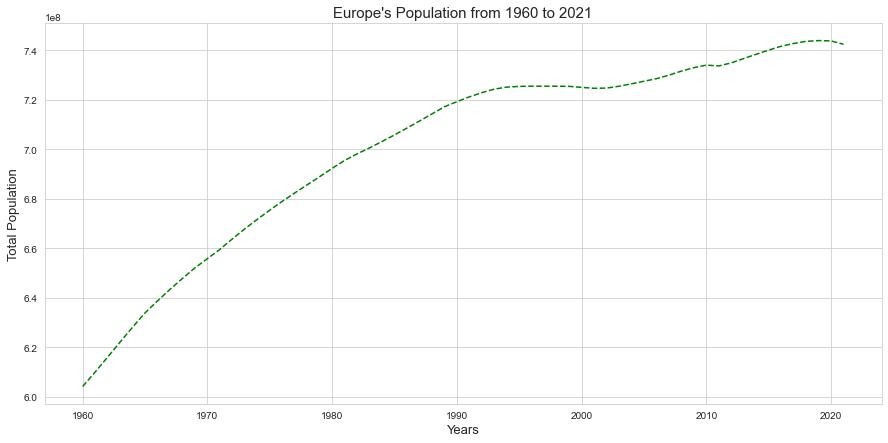

In [23]:
_1960_to_2021.plot(style = '--', color = 'green', figsize = (15,7))
plt.xlabel('Years', fontsize = 13)
plt.ylabel('Total Population', fontsize = 13)
plt.title("Europe's Population from 1960 to 2021", fontsize = 15)

plt.savefig("Europe's Population.jpg")
plt.show()

We can see from the above graph that the European region's population has been continuously increasing at a very fast rate from 1960 till 1994. But after 1994, we see an increase but not very sharp one compared to previous years.

In [24]:
change_1960_to_1990 = _1960_to_2021['1990'] - _1960_to_2021['1960']
print('The change in population from year 1960 to 1990 (30 years) is:', change_1960_to_1990)

change_1991_to_2021 = _1960_to_2021['2021'] - _1960_to_2021['1991']
print('The change in population from year 1991 to 2021 (30 years) is:', change_1991_to_2021)

The change in population from year 1960 to 1990 (30 years) is: 115164808.0
The change in population from year 1991 to 2021 (30 years) is: 21276358.0


The above graph can also be explained by showing some of the above calculated stats. We can see that from 1990 to 2021, there is an increase of around 21 million in the population compared to from the 1960 to 1990, which is 115 million increase in the population!

#### Visualizing the % Growth from year 1961 to 2021

In [25]:
growthData = data[['growth_' + str(year) for year in years[1:]]].mean()

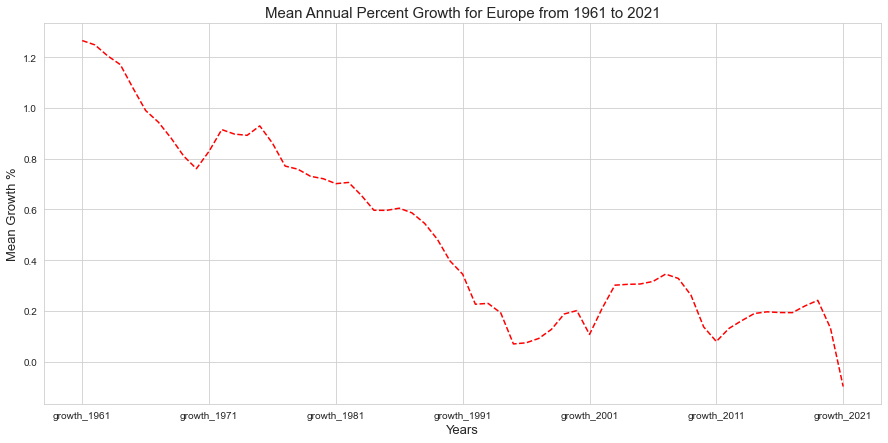

In [26]:
growthData.plot(style = '--', color = 'red', figsize = (15,7))
plt.title('Mean Annual Percent Growth for Europe from 1961 to 2021', fontsize = 15)
plt.ylabel('Mean Growth %', fontsize = 13)
plt.xlabel('Years', fontsize = 13)

plt.savefig("Annual Percent Growth for Europe.jpg")
plt.show()

We can see from the above graph that the annual growth percent has been declining since the year 1961. It can also be seen that for year 2021, the growth percentage is negative which might be due to the COVID-19 effect, we cannot say it certainly, but it might be the reason.

#### Visualizing the European Countries with the IncomeGroup data

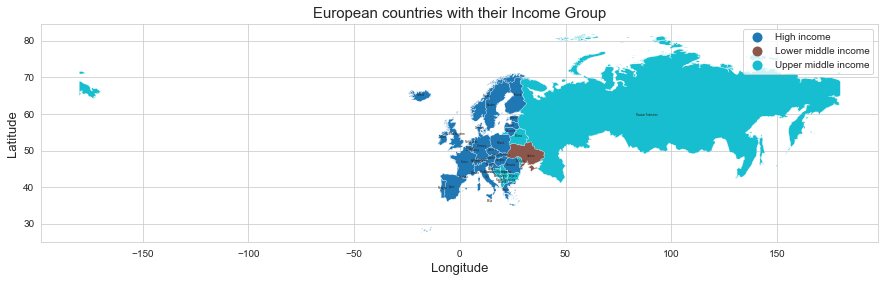

In [27]:
data.plot(column = 'IncomeGroup', legend = True, linewidth = 0.2, figsize = (15,7))

# The following lines of code displays the labels over the map
for index, row in data.iterrows():
    plt.annotate(text=row['Country Name'], xy=row['center'],
                 horizontalalignment='center', fontsize = 2.5)
plt.xlabel('Longitude', fontsize = 13)
plt.ylabel('Latitude', fontsize = 13)
plt.title('European countries with their Income Group', fontsize = 15)

plt.savefig('EU-IncomeGroups.jpg')
plt.show()

The above coropleth map shows the european countries with their Income Groups. We can see that majority of the European countries are in high income group. Whereas the Ukraine is the only country with a lower middle income.

#### Population Trend of Top 10 Populous Countries in 2021

We will visualize the trend of the top 10 populous european countries in 2021 from the year 1960 to 2021.

In [28]:
# Extracting the country names of the top10 countries in 2021
top10_2021 = data.sort_values(by = '2021', ascending = False).head(10)['Country Name'].values.tolist()

# Filtering the data to extract population data of top 10 countries
top10_2021Data = data[data['Country Name'].str.contains(('|').join(top10_2021))]

In [29]:
# Preparing the data to create a group plot for all the countries
populationData = top10_2021Data.iloc[:, 3:66].transpose()
populationData.columns = populationData.iloc[0,:]
populationData = populationData[1:].reset_index().rename(columns = {'index': 'year'})

# Exporting the population data for top 10 countries in 2021
populationData.to_csv('Top10CountriesIn2021_PopData.csv', index = False)

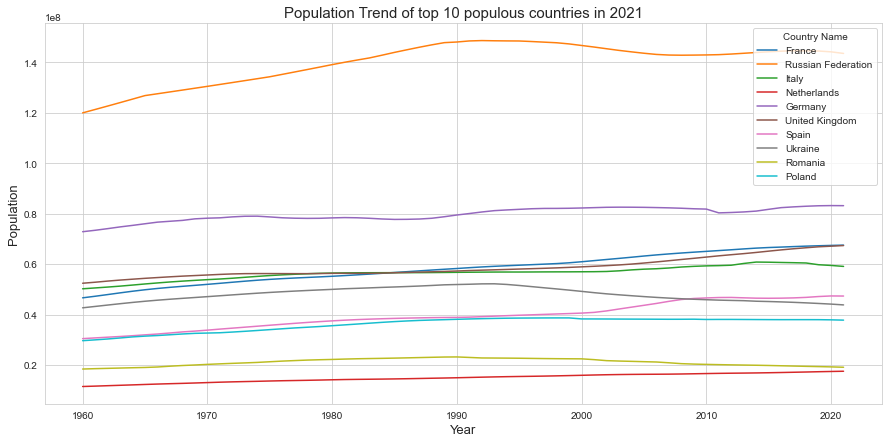

In [30]:
populationData.plot(x = 'year', figsize = (15,7))
plt.title('Population Trend of top 10 populous countries in 2021', fontsize = 15)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Population', fontsize = 13)

plt.savefig('Population Trend of top 10 populous countries in 2021.jpg')
plt.show()

We can see that all of the countries under analysis has observed an uptrend in the population except for some countries such as Ukraine and Romania, which can be seen having declining population after the year 1990. Moreover, after Russia, the highest populous country in Europe is Germany whose population is also seen to be increasing since the year 1960.

#### Europe's population for year 2021

To map the Europe's population, we will remove Russia from the data to visualize the data better since it occupies the whole chart if we add it.

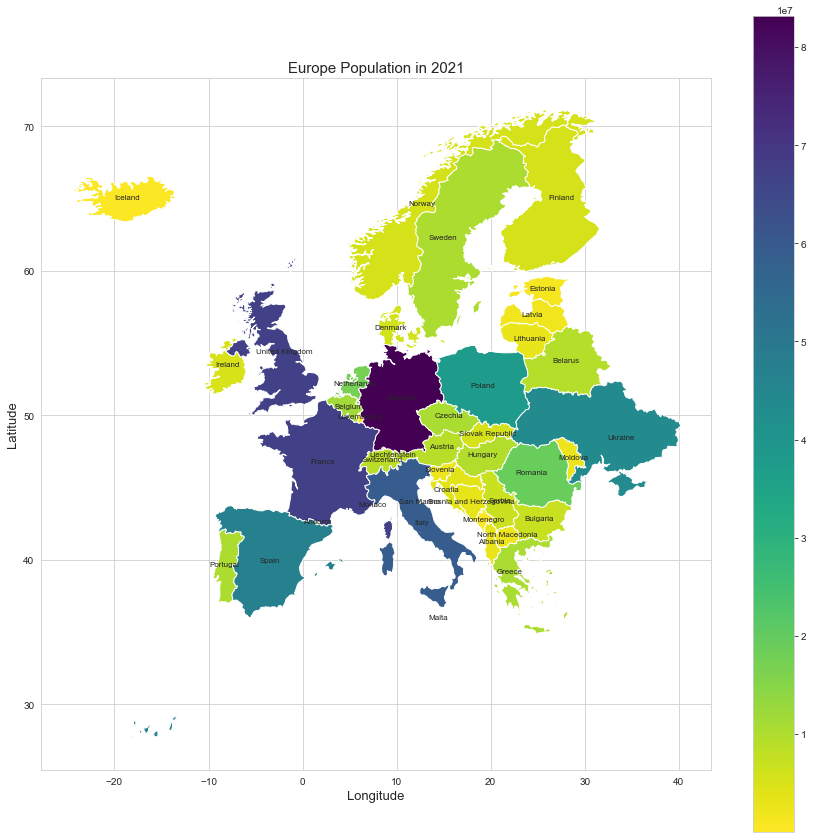

In [31]:
dataWithoutRus = data[data['Country Code'] != 'RUS']
dataWithoutRus.plot(column = '2021', legend = True, figsize = (15,15), cmap = "viridis_r")
plt.title('Europe Population in 2021', fontsize = 15)
plt.xlabel('Longitude', fontsize = 13)
plt.ylabel('Latitude', fontsize = 13)

# The following lines of code displays the labels over the map
for index, row in data.iterrows():
    plt.annotate(text = row['Country Name'], xy = row['center'], horizontalalignment='center', fontsize = 8)

plt.savefig('Europe Population in 2021.jpg')
plt.show()

The above graph shows that population as different colors according to the legend on the right. We can see from the above figure that the highest population is that of Germany.

# Modelling on 1960 to 2021 data to predict future population of Europe using SARIMA (Seasonal AutoRegressive Integrated Moving Average)

Since our data is a time series data which means it has time involved in it, therefore, we cannot use any logistic or linear regression models to forecast the future values. We have to use the SARIMA model which is a statistical analysis model that uses time series data to either better understand the data set and make future predictions.

Before using the SARIMA model, we need to find the best parameters for the model according to the formula 'SARIMA(p,d,q)x(P,D,Q,s)'.

The parameters are: p and seasonal P: indicate the number of autoregressive terms d and seasonal D: indicate differencing that must be done to stationarize series q and seasonal Q: indicate number of moving average terms s: indicates periodicity of the time series (4 for quarterly, 12 for yearly)

For finding the best parameters, we use 'auto_arima' library as done below.

**Source:** https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

Note that we have aggregated the data for all the european countries to make the forecasting. But this same code can also be used to forecast for individual countries.

In [32]:
results = pm.auto_arima(_1960_to_2021, information_criterion='aic', m = 12, d = 1, start_p = 0, start_q = 0, max_p = 5, 
                        n_fits = 50, max_q = 5, start_P = 0, D = 1, start_Q = 0, stepwise = True, trace = True, 
                        error_action = 'ignore', suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1549.988, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1821.955, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1550.940, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1549.754, Time=0.05 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1562.195, Time=0.26 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1652.850, Time=1.26 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1554.697, Time=0.05 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1753.286, Time=0.57 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1550.933, Time=0.16 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1634.252, Time=0.30 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=1531.144, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=1529.267, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=1531.144, Time=0.25 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=1533.209, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0

Storing the best parameters in bestResults list

In [33]:
bestResults = [results.order, results.seasonal_order]

Fitting the SARIMA model to the population from 1960 to 2021

In [34]:
results = sm.tsa.SARIMAX(_1960_to_2021, order = bestResults[0], seasonal_order = bestResults[1]).fit()

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   62
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -773.994
Date:                            Sat, 10 Dec 2022   AIC                           1549.988
Time:                                    23:25:49   BIC                           1551.880
Sample:                                01-01-1960   HQIC                          1550.706
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.357e+12   5.67e+11      4.160      0.000    1.25e+12    3.47e+12
===================================================================================
Ljung-Box (L1) (Q):                  41.92   Jarque-Bera (JB):                 3.14
Prob(Q):                              0.00   Prob(JB):                         0.21
Heteroskedasticity (H):               0.72   Skew:                             0.57
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forescasting the values according to the fitted SARIMA model¶

We will use the get_forecast function of SARIMA model to get the future forecast data

In [36]:
forecasting = results.get_forecast(steps = 29).predicted_mean

In [37]:
forecasting

2022-01-01    743525949.0
2023-01-01    743191149.0
2024-01-01    744442717.0
2025-01-01    746189784.0
2026-01-01    747925395.0
2027-01-01    749602012.0
2028-01-01    751163456.0
2029-01-01    752279741.0
2030-01-01    753141687.0
2031-01-01    753454047.0
2032-01-01    753311882.0
2033-01-01    751974925.0
2034-01-01    752996354.0
2035-01-01    752661554.0
2036-01-01    753913122.0
2037-01-01    755660189.0
2038-01-01    757395800.0
2039-01-01    759072417.0
2040-01-01    760633861.0
2041-01-01    761750146.0
2042-01-01    762612092.0
2043-01-01    762924452.0
2044-01-01    762782287.0
2045-01-01    761445330.0
2046-01-01    762466759.0
2047-01-01    762131959.0
2048-01-01    763383527.0
2049-01-01    765130594.0
2050-01-01    766866205.0
Freq: AS-JAN, Name: predicted_mean, dtype: float64

These are the values that have been forcasted for the future time after 2021. The values are also visualized in the figure below. The plot clearly shows the predicted values. 

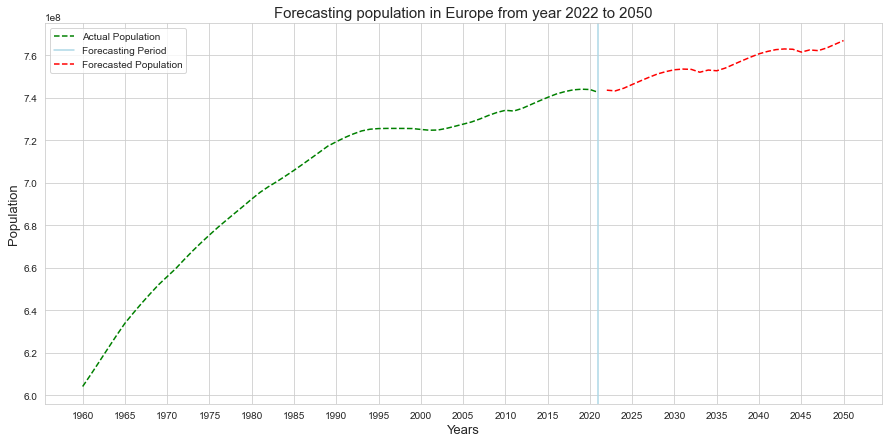

In [38]:
# Creating list of forecasting and all years
forecastingYears = [str(year) for year in range(2022, 2051)]
allYears = [str(year) for year in range(1960, 2051)]

# Plotting the forecasted population in Europe
plt.figure(figsize=(15,7))
plt.plot(_1960_to_2021, 'g--')
plt.axvline('2021', color = '#ADD8E6')
plt.plot(forecastingYears, forecasting.values, 'r--')

plt.title('Forecasting population in Europe from year 2022 to 2050', fontsize = 15)
plt.xlabel('Years', fontsize = 13)
plt.ylabel('Population', fontsize = 13)
plt.xticks(allYears[::5])

plt.legend(['Actual Population', 'Forecasting Period', 'Forecasted Population'])

plt.savefig('ForecastedPopulation_Europe.jpg')
plt.show()

The above figure shows the Time series population for Europe from year 1960 to 2021. For training the model, all the years have been considered from 1960 to 2021 as shown in the x-axis of the graph. On the y-axis we have the population. The red line after the vertical blue lines shows the predicted population. The values have been predicted for the year after 2021. Our prediction are quite reasonable when looking into the plot. By 2050, the population is expected to reach 760 million, which is around 740 million currently in the year 2021.

# Summary

From the visualizations, we saw that the population in the Europe has increased over time from the year 1960 to 2021. Since the data had only the population of each countries, we calculated the annual population growth percentage since it is one of the important factors to generalize the current population trends. We saw that the % annual growth has been decreasing since 1960 and in 2021, it was negative!

Moreover, after visualizing the population trends and performing analysis, we used SARIMA model to forecast the population till the year 2050. The forecasted population followed the same pattern of increasing trend uptil 2050!

# Difficulties Faced

The Russian Federation has a very big geometry due to which it is difficult to visualize the remaining countries on the map. The gpd.explore() function does provide us an interactive way to map the countries but it has a lot of missing features and this feature has very less documentation such as we couldn't find how we can label the countries, or change the colors according to population, or alter the details in the pop-up when we hover the polygons.

# Take-away message

We have made future projections of the population for the Europe, however, the same code could be used to make individual forecasting for any of the country in the world. The stakeholders can use these forecasted results to make better policies according to their increasing population. Moreover, they can use this to create jobs in the market to avoid increasing the unemployement over the time period.